In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [2]:
num_data=1000
x=init.uniform_(torch.Tensor(num_data,1), -15, 15)
noise=init.normal_(torch.FloatTensor(num_data,1), std=3)

y1=(x**4)+(x**2)
y2=(x**2)+x

y1_noise = (x+noise)**4 + (x+noise)**2
y2_noise = (x+noise)**2+ (x+noise)

## y1 함수

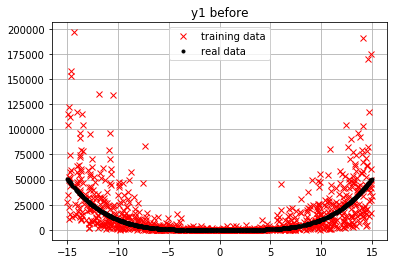

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x.data, y1_noise.data, 'rx')
plt.plot(x.data, y1.data, 'k.')
plt.legend(['training data', 'real data'])
plt.title('y1 before')
plt.grid(True)
plt.show()

In [4]:
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=3),
    nn.ReLU(),
    nn.Linear(in_features=3, out_features=5),
    nn.ReLU(),
    nn.Linear(in_features=5, out_features=8),
    nn.ReLU(),
    nn.Linear(in_features=8, out_features=8),
    nn.ReLU(),
    nn.Linear(in_features=8, out_features=8),
    nn.ReLU(),
    nn.Linear(in_features=8, out_features=1),
)

In [5]:
num_epoch=1000
# 제가 ktx 와이파이라서..
loss_func=nn.MSELoss()
optimizer=optim.Adam(model.parameters(), lr=0.005)
# SGD를 쓰니까 y1이 안돼고, Adam을 쓰니까 됨!

In [6]:
loss_array1=[]

for i in range(num_epoch):
    optimizer.zero_grad()
    output=model(x)
    
    loss=loss_func(output, y1_noise)
    loss.backward()
    
    optimizer.step()
    loss_array1.append(loss.data)

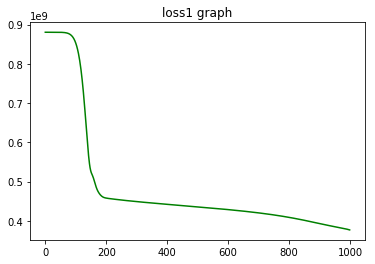

In [7]:
plt.plot(loss_array1,'g-')
plt.title('loss1 graph')
plt.show()

In [8]:
num_data = 1000
test_x = init.uniform_(torch.Tensor(num_data,1),-15,15)
test_y = model(test_x)

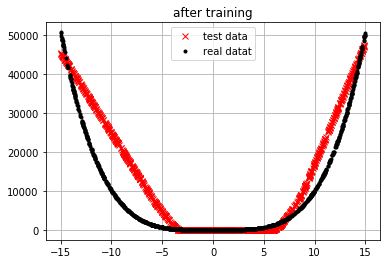

In [9]:
plt.plot(test_x.data, test_y.data,'rx')
plt.plot(x.data,y1.data, 'k.')
plt.legend(['test data','real datat'])
plt.title('after training')
plt.grid(True)
plt.show()

## y2 함수

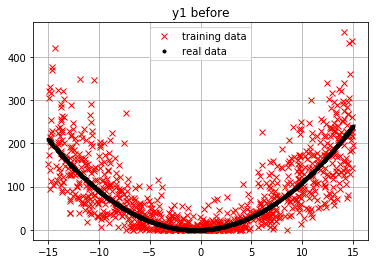

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x.data, y2_noise.data, 'rx')
plt.plot(x.data, y2.data, 'k.')
plt.legend(['training data', 'real data'])
plt.title('y1 before')
plt.grid(True)
plt.show()

In [11]:
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=3),
    nn.ReLU(),
    nn.Linear(in_features=3, out_features=5),
    nn.ReLU(),
    nn.Linear(in_features=5, out_features=8),
    nn.ReLU(),
    nn.Linear(in_features=8, out_features=8),
    nn.ReLU(),
    nn.Linear(in_features=8, out_features=8),
    nn.ReLU(),
    nn.Linear(in_features=8, out_features=1),
)

In [12]:
num_epoch=1000
loss_func=nn.MSELoss()
optimizer=optim.SGD(model.parameters(), lr=0.00001)

In [13]:
loss_array2=[]

for i in range(num_epoch):
    optimizer.zero_grad()
    output=model(x)
    
    loss=loss_func(output, y2_noise)
    loss.backward()
    
    optimizer.step()
    loss_array2.append(loss.data)

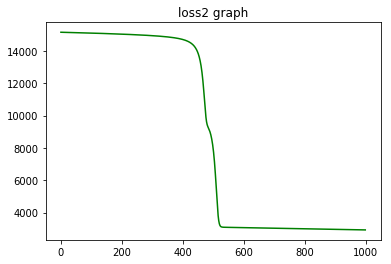

In [14]:
plt.plot(loss_array2,'g-')
plt.title('loss2 graph')
plt.show()
# 얘 왜이러죠?

In [15]:
num_data = 1000
test_x = init.uniform_(torch.Tensor(num_data,1),-15,15)
test_y = model(test_x)

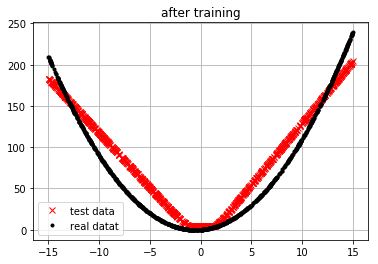

In [16]:
plt.plot(test_x.data, test_y.data,'rx')
plt.plot(x.data,y2.data, 'k.')
plt.legend(['test data','real datat'])
plt.title('after training')
plt.grid(True)
plt.show()
# 이게 learning_rate 이것저것 해봤을때 그나마 나았던거